# Install PyREMOT Package

In [2]:
pip install PyREMOT

Note: you may need to restart the kernel to use updated packages.


# CHECK COMPONENT AVAILABLE IN THE CURRENT VERSION

In [4]:
### IMPORT PACKAGES/MODULES ###
#------------------------------
from PyREMOT import rmtCom

### CHECK COMPONENT ###
#-----------------------
res = rmtCom()
print(res)


CO2,H2,CH3OH,H2O,CO,DME,N2,CH4,C2H4,C3H6,C3H8,C4H10


# STEADY-STATE MODELING

DATA TAKEN FROM:

I. Iliuta, F. Larachi, P. Fongarland, Dimethyl Ether Synthesis with in situ H2O Removal in Fixed-Bed Membrane Reactor: Model and Simulations, Ind Eng Chem Res. 49 (2010) 6870–6877. https://doi.org/10.1021/ie901726u.

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete


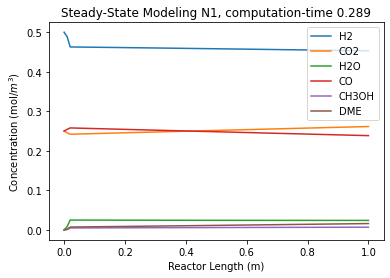

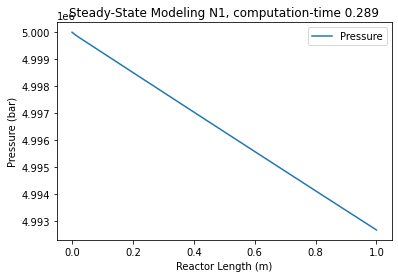

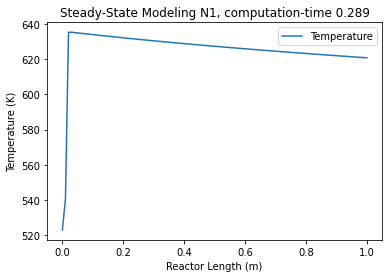

In [5]:
### IMPORT PACKAGES/MODULES ###
#------------------------------
import math
from PyREMOT import rmtExe

### OPERATING CONDITIONS ###
#----------------------------
# pressure [Pa]
P = 5000000
# temperature [K]
T = 523
# process-type [-]
PrTy = "non-iso-thermal"

### FEED PROPERTIES ###
#-----------------------
# species-concentration [mol/m^3]
SpCoi = [574.8978, 287.4489, 1.15e-02, 287.4489, 1.15e-02, 1.15e-02]
# flowrate @ P & T [m^3/s]
VoFlRa = 0.000228

### REACTOR SPEC ###
#-------------------
# reactor-length [m]
ReLe = 1
# reactor-inner-diameter [m]
ReInDi = 0.0381
# bed-void-fraction [-]
BeVoFr = 0.39
# catalyst bed density [kg/m^3]
CaBeDe = 1171.2
# particle-diameter [m]
PaDi = 0.002
# particle-density [kg/m^3]
CaDe = 1920
# particle-specific-heat-capacity  [J/kg.K]
CaSpHeCa = 960

### HEAT-EXCHANGER SPEC ###
#---------------------------
# overall-heat-transfer-coefficient [J/m^2.s.K]
U = 50
# medium-temperature [K]
Tm = 523

### SOLVER SETTING ###
#---------------------
# ode-solver [-]
ivp = "default"
# display-result [-]
diRe = "True"

### COMPONENT LIST ###
#----------------------
compList = ["H2","CO2","H2O","CO","CH3OH","DME"]

### REACTION LIST ###
#---------------------
reactionSet = {
  "R1":"CO2+3H2<=>CH3OH+H2O",
  "R2":"CO+H2O<=>H2+CO2",
  "R3":"2CH3OH<=>DME+H2O"
}

### REACTION RATE PARAMS ###
#----------------------------

varis0 = {
  "CaBeDe": CaBeDe,
  "RT": lambda x: x['R_CONST']*x['T'],
  "K1": lambda x: 35.45*math.exp(-1.7069e4/x['RT']),
  "K2": lambda x: 7.3976*math.exp(-2.0436e4/x['RT']),
  "K3": lambda x: 8.2894e4*math.exp(-5.2940e4/x['RT']),
  "KH2": lambda x: 0.249*math.exp(3.4394e4/x['RT']),
  "KCO2": lambda x: 1.02e-7*math.exp(6.74e4/x['RT']),
  "KCO": lambda x: 7.99e-7*math.exp(5.81e4/x['RT']),
  "Ln_KP1": lambda x: 4213/x['T'] - 5.752 *     math.log(x['T']) - 1.707e-3*x['T'] + 2.682e-6 *     (math.pow(x['T'], 2)) - 7.232e-10*(math.pow(x['T'], 3)) + 17.6,
  "KP1": lambda x: math.exp(x['Ln_KP1']),
  "log_KP2": lambda x: 2167/x['T'] - 0.5194 *     math.log10(x['T']) + 1.037e-3*x['T'] - 2.331e-7 *     (math.pow(x['T'], 2)) - 1.2777,
  "KP2": lambda x: math.pow(10, x['log_KP2']),
      "Ln_KP3": lambda x:  4019/x['T'] + 3.707 *     math.log(x['T']) - 2.783e-3*x['T'] + 3.8e-7 *     (math.pow(x['T'], 2)) - 6.56e-4/(math.pow(x['T'], 3)) - 26.64,
  "KP3": lambda x:  math.exp(x['Ln_KP3']),
  "yi_H2": lambda x:  x['MoFri'][0],
  "yi_CO2": lambda x:  x['MoFri'][1],
  "yi_H2O": lambda x:  x['MoFri'][2],
  "yi_CO": lambda x:  x['MoFri'][3],
  "yi_CH3OH": lambda x:  x['MoFri'][4],
  "yi_DME": lambda x:  x['MoFri'][5],
  "PH2": lambda x:  x['P']*(x['yi_H2'])*1e-5,
  "PCO2": lambda x:  x['P']*(x['yi_CO2'])*1e-5,
  "PH2O": lambda x:  x['P']*(x['yi_H2O'])*1e-5,
  "PCO": lambda x: x['P']*(x['yi_CO'])*1e-5,
  "PCH3OH": lambda x:  x['P']*(x['yi_CH3OH'])*1e-5,
  "PCH3OCH3": lambda x:  x['P']*(x['yi_DME'])*1e-5,
  "ra1": lambda x:  x['PCO2']*x['PH2'],
  "ra2": lambda x:  1 + (x['KCO2']*x['PCO2']) + (x['KCO']*x['PCO']) + math.sqrt(x['KH2']*x['PH2']),
  "ra3": lambda x: (1/x['KP1'])*((x['PH2O']*x['PCH3OH'])/(x['PCO2']*(math.pow(x['PH2'], 3)))),
  "ra4": lambda x:  x['PH2O'] - (1/x['KP2'])*((x['PCO2']*x['PH2'])/x['PCO']),
  "ra5": lambda x: (math.pow(x['PCH3OH'], 2)/x['PH2O'])-(x['PCH3OCH3']/x['KP3'])
}


### REACTION RATE EXPRESSIONS ###
#--------------------------------
rates0 = {
  "r1": lambda x: 1000*x['K1']*(x['ra1']/(math.pow(x['ra2'], 3)))*(1-x['ra3'])*x['CaBeDe'],
  "r2": lambda x: 1000*x['K2']*(1/x['ra2'])*x['ra4']*x['CaBeDe'],
  "r3": lambda x: 1000*x['K3']*x['ra5']*x['CaBeDe']
}



### MODEL INPUTS ###
#-------------------
modelInput = {
  "model": "N1",
  "operating-conditions": {
      "pressure": P,
      "temperature": T,
      "process-type": PrTy,
  },
  "feed": {
      "volumetric-flowrate": VoFlRa,
      "concentration": SpCoi,
      "components": {
          "shell": compList,
      }
  },
  "reactions": reactionSet,
  "reaction-rates": {
    "VARS": varis0,
    "RATES": rates0
  },
  "external-heat": {
    "OvHeTrCo": U,
    "MeTe": Tm
  },
  "reactor": {
      "ReInDi": ReInDi,
      "ReLe": ReLe,
      "PaDi": PaDi,
      "BeVoFr": BeVoFr,
      "CaBeDe": CaBeDe,
      "CaDe": CaDe,
      "CaSpHeCa": CaSpHeCa
  },
  "solver-config": {
      "ivp": ivp,
      "display-result": diRe
  }
}


### RUN MODELLING ###
#--------------------
res = rmtExe(modelInput)
